# Functionality: visualization of ciCOH Hist

## Import Packages 

In [1]:
import os, sys
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt

from igraph.drawing.text import TextDrawer
import cairo

In [2]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)


# import animal_folder function in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

# import graphVisual in connAnalyTool/graphVisual.pynb 
from connAnalyTool import graphVisual

importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/graphVisual.ipynb


## Preparasion

### exp subfolders & code_corresfolder

In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

# corresfolder
corresfolder,correparentfolder = code_corresfolder(os.getcwd(), nb_name)

### global parameters

In [5]:
# frequency
freq = [29, 31]
strfreq = 'freq' + str(freq[0]) + '_' + str(freq[1])

In [6]:
### text setup for brain areas ###
texts_area = dict()

texts_area['VPLo'] = [20, 40, 20]

texts_area['VLo'] = [20, 120, 20]

texts_area['VA'] = [20, 200, 20]

texts_area['SMA'] = [20, 320, 20]

texts_area['M1'] = [20, 500, 20]

texts_area['STN'] = [280, 140, 20]

texts_area['GP'] = [360, 250, 20]

In [7]:
areas_unwanted = ['lCd','rMC']

### input setup

In [12]:
inputfolder_baseline = os.path.join(correparentfolder, 'm1_SKT_calcciCOH_baseline' 
                           + '_Fre' + str(freq[0]) + '-' + str(freq[1]) +'Hz')
inputfolder_reach = os.path.join(correparentfolder, 'm1_SKT_calcciCOH_reach' 
                           + '_Fre' + str(freq[0]) + '-' + str(freq[1]) +'Hz')
inputfolder_return = os.path.join(correparentfolder, 'm1_SKT_calcciCOH_return' 
                           + '_Fre' + str(freq[0]) + '-' + str(freq[1]) +'Hz')

filename_baseline = 'ciCOH_STK_baseline' + '_freq_' + str(freq[0]) + '_' + str(freq[1]) + '.pickle'
filename_reach = 'ciCOH_STK_reach' + '_freq_' + str(freq[0]) + '_' + str(freq[1]) + '.pickle'
filename_return = 'ciCOH_STK_return' + '_freq_' + str(freq[0]) + '_' + str(freq[1]) + '.pickle'

file_baseline = os.path.join(inputfolder_baseline, filename_baseline)
file_reach = os.path.join(inputfolder_reach, filename_reach)
file_return = os.path.join(inputfolder_return, filename_return)

### save setup

In [10]:
savefolder = corresfolder
savefile_prefix_origin = 'ciCOH_Hist' + '_' + strfreq 

## Load ciCOH and Channel

In [13]:
fp = open(file_baseline, 'rb')
ciCOH_baseline = pickle.load(fp)

fp = open(file_reach, 'rb')
ciCOH_reach = pickle.load(fp)

fp = open(file_return, 'rb')
ciCOH_return = pickle.load(fp)

In [14]:
# ciCOH
ciCOH_normal_baseline, ciCOH_mild_baseline = ciCOH_baseline['normal'], ciCOH_baseline['mild']
ciCOH_normal_reach, ciCOH_mild_reach = ciCOH_reach['normal'], ciCOH_reach['mild']
ciCOH_normal_return, ciCOH_mild_return = ciCOH_return['normal'], ciCOH_return['mild']

# channel information
chnInf_recchni, chnInf_matchni = ciCOH_baseline['chnInf_recchni'], ciCOH_baseline['chnInf_matchni']
chnInf_brainarea, chnInf_coord = ciCOH_baseline['chnInf_brainarea'], ciCOH_baseline['chnInf_coord']

## Del unwanted channels

In [15]:
def unwanted_chandata_del(ciCOH, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord):
    
    chns_unwanted = []
    for area_unwanted in areas_unwanted:
        for i, area in enumerate(chnInf_brainarea):
            if area == area_unwanted:
                chns_unwanted.append(i)
    
    nchns = ciCOH.shape[0]
    ciCOH = np.delete(ciCOH, chns_unwanted, axis = 0)
    ciCOH = np.delete(ciCOH, chns_unwanted, axis = 1)
    
    
    chnInf_recchni = [i for j, i in enumerate(chnInf_recchni) if j not in chns_unwanted]
    chnInf_brainarea = [i for j, i in enumerate(chnInf_brainarea) if j not in chns_unwanted]
    chnInf_coord = [i for j, i in enumerate(chnInf_coord) if j not in chns_unwanted]

    return ciCOH

In [22]:
ciCOH_normal_baseline = \
        unwanted_chandata_del(ciCOH_normal_baseline, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)
ciCOH_mild_baseline = \
        unwanted_chandata_del(ciCOH_mild_baseline, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)


ciCOH_normal_reach = \
        unwanted_chandata_del(ciCOH_normal_reach, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)
ciCOH_mild_reach = \
        unwanted_chandata_del(ciCOH_mild_reach, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)



ciCOH_normal_return = \
        unwanted_chandata_del(ciCOH_normal_return, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)
ciCOH_mild_return = \
        unwanted_chandata_del(ciCOH_mild_return, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)


## Hist

### normal

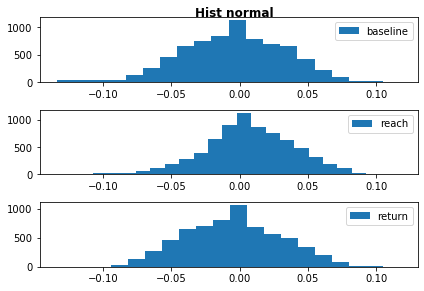

In [98]:
cond = 'normal'

x_normal_baseline = np.reshape(ciCOH_normal_baseline, (-1))
x_normal_reach = np.reshape(ciCOH_normal_reach, (-1))
x_normal_return = np.reshape(ciCOH_normal_return, (-1))


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_normal_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_normal_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)

title = 'Hist ' + cond 
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))

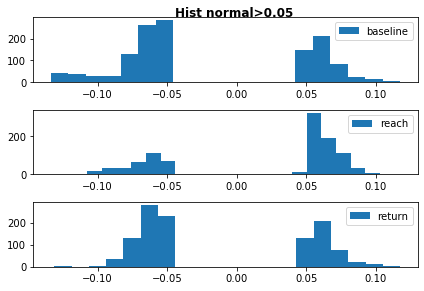

In [99]:
cond = 'normal'

x_normal_baseline = np.reshape(ciCOH_normal_baseline, (-1))
x_normal_reach = np.reshape(ciCOH_normal_reach, (-1))
x_normal_return = np.reshape(ciCOH_normal_return, (-1))


x_normal_baseline = x_normal_baseline[abs(x_normal_baseline)>=0.05]
x_normal_reach = x_normal_reach[abs(x_normal_reach)>=0.05]
x_normal_return = x_normal_return[abs(x_normal_return)>=0.05]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_normal_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_normal_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)


title = 'Hist ' + cond + '>0.05'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))

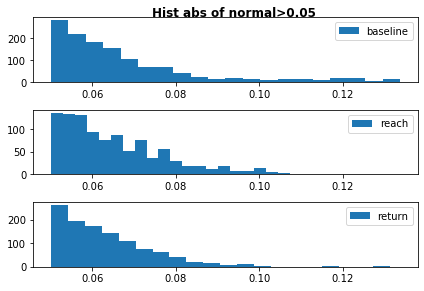

In [104]:
cond = 'normal'

x_normal_baseline = np.reshape(abs(ciCOH_normal_baseline), (-1))
x_normal_reach = np.reshape(abs(ciCOH_normal_reach), (-1))
x_normal_return = np.reshape(abs(ciCOH_normal_return), (-1))


x_normal_baseline = x_normal_baseline[abs(x_normal_baseline)>=0.05]
x_normal_reach = x_normal_reach[abs(x_normal_reach)>=0.05]
x_normal_return = x_normal_return[abs(x_normal_return)>=0.05]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_normal_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_normal_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)


title = 'Hist abs of ' + cond + '>0.05'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))

### mild

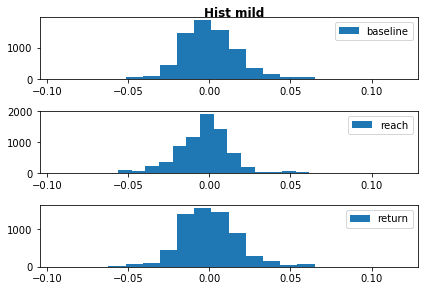

In [100]:
cond = 'mild'

x_mild_baseline = np.reshape(ciCOH_mild_baseline, (-1))
x_mild_reach = np.reshape(ciCOH_mild_reach, (-1))
x_mild_return = np.reshape(ciCOH_mild_return, (-1))


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_mild_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_mild_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_mild_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)

title = 'Hist ' + cond 
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))

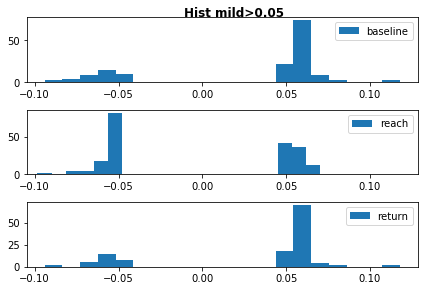

In [101]:
cond = 'mild'

x_mild_baseline = np.reshape(ciCOH_mild_baseline, (-1))
x_mild_reach = np.reshape(ciCOH_mild_reach, (-1))
x_mild_return = np.reshape(ciCOH_mild_return, (-1))


x_mild_baseline = x_mild_baseline[abs(x_mild_baseline)>=0.05]
x_mild_reach = x_mild_reach[abs(x_mild_reach)>=0.05]
x_mild_return = x_mild_return[abs(x_mild_return)>=0.05]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_mild_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_mild_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_mild_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)

title = 'Hist ' + cond + '>0.05'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))

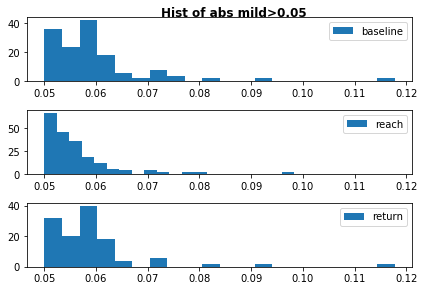

In [103]:
cond = 'mild'

x_mild_baseline = np.reshape(abs(ciCOH_mild_baseline), (-1))
x_mild_reach = np.reshape(abs(ciCOH_mild_reach), (-1))
x_mild_return = np.reshape(abs(ciCOH_mild_return), (-1))


x_mild_baseline = x_mild_baseline[abs(x_mild_baseline)>=0.05]
x_mild_reach = x_mild_reach[abs(x_mild_reach)>=0.05]
x_mild_return = x_mild_return[abs(x_mild_return)>=0.05]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_mild_baseline, bins=n_bins, label = 'baseline')
axs[1].hist(x_mild_reach, bins=n_bins, label = 'reach')
axs[2].hist(x_mild_return, bins=n_bins, label = 'return')


axs[0].legend()
axs[1].legend()
axs[2].legend()

left, right = axs[0].set_xlim()
axs[1].set_xlim(left = left, right=right)
axs[2].set_xlim(left = left, right=right)

title = 'Hist of abs ' + cond + '>0.05'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, title + '.png'))